# Курсовая работа. EDA-анализ по данным образовательной платформы

[Codebook](#Codebook) <br>
[1. Описание и начальная работа с данными](#1.1-Описание-и-начальная-работа-с-данными)<br>
[2. Расчет потенциальной нагрузки на преподавателей](#2.-Расчет-потенциальной-нагрузки-на-преподавателей)<br>
[3. Выявление проблемных модулей](#3.-Выявление-проблемных-модулей)<br>
[4. Расчет конверсии](#4.-Расчет-конверсии) <br>
[5. Метрика успеваемости ](#5.-Метрика-успеваемости)

## Codebook

`courses.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `id` – идентификатор курса <br>
&nbsp;&nbsp;&nbsp;&nbsp; `title` – название курса <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `field` – сфера, к которой относится курс <br> <br><br>
`students.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `id` – идентификатор студента <br>
&nbsp;&nbsp;&nbsp;&nbsp; `city` – город студента <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `birthday` – день рождения студента <br> <br><br>
`course_contents.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `course_id` – идентификатор курса <br>
&nbsp;&nbsp;&nbsp;&nbsp; `module_number` – номер модуля <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `module_title` – название модуля <br> 
&nbsp;&nbsp;&nbsp;&nbsp; `lesson_number` – номер урока <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `lesson_title` – название урока <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `lesson_token` – токен урока <br> 
&nbsp;&nbsp;&nbsp;&nbsp; `is_video` – наличие видео *(true/false)* <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `is_homework` – наличие домашней работы *(true/false)* <br>
<br><br>
`progresses.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `id` – идентификатор прогресса <br>
&nbsp;&nbsp;&nbsp;&nbsp; `student_id` – идентификатор студента <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `course_id` – идентификатор курса <br> <br><br>
`progress_phases.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `progress_id` – идентификатор прогресса <br>
&nbsp;&nbsp;&nbsp;&nbsp; `module_number` – номер модуля <br>
&nbsp;&nbsp;&nbsp;&nbsp; `lesson_number` – номер урока <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `status` – статус прохождения урока <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `start_date` – дата начала <br> 
&nbsp;&nbsp;&nbsp;&nbsp; `finish_date` – дата окончания <br>
<br><br>

## 1. Описание и начальная работа с данными

In [417]:
import pandas as pd 
from matplotlib import pyplot as plt 
import datetime as dt
import re
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [418]:
# Импортируем датафреймы
courses = pd.read_csv("courses.csv").rename(columns={"id" : "course_id"}) # rename, чтобы прошел merge
course_contents = pd.read_csv("course_contents.csv")
progresses = pd.read_csv("progresses.csv").rename(columns={"id" : "progress_id"})
progress_phases = pd.read_csv("progress_phases.csv")
students = pd.read_csv("students.csv", parse_dates=["birthday"])

# Последовательно объединяем датафреймы 
main = courses.merge(course_contents, on="course_id").merge(progresses).merge(progress_phases)

In [419]:
main

,Unnamed: 0,course_id,title,field,module_number,module_title,lesson_number,lesson_title,lesson_token,is_video,is_homework,progress_id,student_id,status,start_date,finish_date
0,0,943306102e5b067d08a29094f37b8193,Java-разработчик c нуля,Development,1,Вводный модуль,1,Какие бывают программы,cf394764-8850-4a0a-8d02-03470fe5345c,True,False,45cdf025b87db75e84f93c4ac3ccb5c7,0b4656b84ca60350583f8fbe236dda86,done,2019-03-29 17:02:32.838469+00,2019-04-13 17:32:19.134874+00
1,0,943306102e5b067d08a29094f37b8193,Java-разработчик c нуля,Development,1,Вводный модуль,1,Какие бывают программы,cf394764-8850-4a0a-8d02-03470fe5345c,True,False,0c56109dde49080e7441e95b22bb73c2,1d874e6b6bdc34559781f65f9f761791,done,2019-06-13 19:22:19.331201+00,2019-06-13 19:51:21.987534+00
2,0,943306102e5b067d08a29094f37b8193,Java-разработчик c нуля,Development,1,Вводный модуль,1,Какие бывают программы,cf394764-8850-4a0a-8d02-03470fe5345c,True,False,36079c0615d85f3cebfa47542b43ab41,ab7f5c720e3a5e1de00c2cdbef19fbf0,done,2019-03-27 06:56:51.138795+00,2019-03-27 06:56:54.834751+00
3,0,943306102e5b067d08a29094f37b8193,Java-разработчик c нуля,Development,1,Вводный модуль,1,Какие бывают программы,cf394764-8850-4a0a-8d02-03470fe5345c,True,False,37384cbeb141835cc61b5fd22abd9200,29ab3f8c52a858bea2d3b9a51c433578,done,2019-05-28 11:09:29.320478+00,2019-05-29 06:47:21.794092+00
4,0,943306102e5b067d08a29094f37b8193,Java-разработчик c нуля,Development,1,Вводный модуль,1,Какие бывают программы,cf394764-8850-4a0a-8d02-03470fe5345c,True,False,3a79d622c4057c1c029c74e282e43396,72afe01498ba14045467fc32029b650c,done,2019-03-24 07:03:03.582679+00,2019-03-24 09:50:32.595199+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350672,14,6e4837f0a65c68efbfdd0594d6774701,Java-разработчик,Development,17,Итоговая тема,1,Экзаменационная работа,8c7e7ee4-8141-47f5-a3b4-57a82c4c345c,False,True,f507e59fe8d11a05e82c5143f8b11778,d905eb5ec9a1288f9a70944cf80f3537,start,2018-10-26 16:35:31.562597+00,NaN
350673,14,6e4837f0a65c68efbfdd0594d6774701,Java-разработчик,Development,17,Итоговая тема,1,Экзаменационная работа,8c7e7ee4-8141-47f5-a3b4-57a82c4c345c,False,True,6f6ffe4ee41520199529f53b20fc35e9,7f5bc676040d60ee638b94fd6d9fca53,start,2018-07-27 13:02:26.309088+00,NaN
350674,14,6e4837f0a65c68efbfdd0594d6774701,Java-разработчик,Development,17,Итоговая тема,1,Экзаменационная работа,8c7e7ee4-8141-47f5-a3b4-57a82c4c345c,False,True,66ff04d276a67a3db09ba1c5fa14b581,1e7f607c6c4e1449915ece32352ed58b,done,2019-03-23 11:59:16.101317+00,2019-03-23 11:59:20.423056+00
350675,14,6e4837f0a65c68efbfdd0594d6774701,Java-разработчик,Development,17,Итоговая тема,1,Экзаменационная работа,8c7e7ee4-8141-47f5-a3b4-57a82c4c345c,False,True,dd816a722f6d339329f278a58c35ae6b,70e8b38a4d3de9edb6fb4042a67171e3,start,2018-10-29 14:53:53.764514+00,NaN


In [420]:
main[main.student_id == '768c2987a744c51ce64a5993a2a94eaf'].head() # проверка основного датасета

,Unnamed: 0,course_id,title,field,module_number,module_title,lesson_number,lesson_title,lesson_token,is_video,is_homework,progress_id,student_id,status,start_date,finish_date
96372,5,e9bb9205eeed307ee7cbaa08bfd166c3,JavaScript с нуля,Development,1,Знакомство с языком,1,Интро,0d4678b0-abfe-4132-9193-97f9b0f08d3a,True,False,c90ebe1431eac5cbb11692100b7a0f8d,768c2987a744c51ce64a5993a2a94eaf,done,2018-06-19 10:40:05.063485+00,2018-06-19 14:56:16.346353+00
97338,5,e9bb9205eeed307ee7cbaa08bfd166c3,JavaScript с нуля,Development,1,Знакомство с языком,2,Что умеет JavaScript и почему он так популярен?,6af5b93a-593b-48a0-bb03-42fa2571ede5,True,False,c90ebe1431eac5cbb11692100b7a0f8d,768c2987a744c51ce64a5993a2a94eaf,done,2018-06-19 14:56:16.570129+00,2018-06-19 15:08:13.930725+00
97948,5,e9bb9205eeed307ee7cbaa08bfd166c3,JavaScript с нуля,Development,1,Знакомство с языком,3,Инструменты разработчика,460c54ea-d899-44d3-8940-00302ff5f2e5,True,False,c90ebe1431eac5cbb11692100b7a0f8d,768c2987a744c51ce64a5993a2a94eaf,done,2018-06-19 15:08:14.103923+00,2018-06-19 15:39:53.661163+00
98518,5,e9bb9205eeed307ee7cbaa08bfd166c3,JavaScript с нуля,Development,1,Знакомство с языком,4,"Hello, world!",73315f69-8587-4f46-ab6b-fe57c8f1aa52,True,False,c90ebe1431eac5cbb11692100b7a0f8d,768c2987a744c51ce64a5993a2a94eaf,done,2018-06-19 15:39:53.923777+00,2018-06-19 18:10:52.1737+00
99076,5,e9bb9205eeed307ee7cbaa08bfd166c3,JavaScript с нуля,Development,1,Знакомство с языком,5,Синтаксис языка,fe10ef7f-44cb-4184-b06f-d7c38b0e81a5,True,False,c90ebe1431eac5cbb11692100b7a0f8d,768c2987a744c51ce64a5993a2a94eaf,done,2018-06-19 18:10:52.316728+00,2018-06-19 18:35:38.720317+00


In [421]:
# Общее количество курсов в датасете: 
course_num = len(main.groupby("course_id"))
course_num

15

In [422]:
# Количество модулей на каждом курсе:
modules_num = main[["title", "module_number"]].groupby("title").nunique().rename(
    columns={"module_number" : "modules_count"}
    )
modules_num

,modules_count
title,
Excel Базовый,9
Java-разработчик,17
Java-разработчик c нуля,9
JavaScript с нуля,18
PHP-разработчик с 0 до PRO. Часть 1,8
SMM-маркетолог от А до Я,11
UX-дизайн,20
Анимация интерфейсов,21
Веб-вёрстка для начинающих 2.0,8


In [423]:
# Количество уроков в каждом модуле на каждом курсе: 
lessons_num = main[["title", "module_number", "lesson_number"]].groupby(
    ["title", "module_number"]
    ).nunique().rename(columns={"lesson_number" : "lessons_count"})
lessons_num

lessons_count
title                         module_number               
Excel Базовый                 1                         11
                              2                          7
                              3                          3
                              4                          7
                              5                          5
...                                                    ...
Руководитель digital-проектов 13                         4
                              14                         7
                              15                        12
                              16                         8
                              17                         4

[229 rows x 1 columns]

In [424]:
# Медианное количество уроков в каждом модуле на каждом курсе   
lessons_num.reset_index()[["title", "lessons_count"]].groupby("title").median()

,lessons_count
title,
Excel Базовый,5.0
Java-разработчик,7.0
Java-разработчик c нуля,13.0
JavaScript с нуля,7.0
PHP-разработчик с 0 до PRO. Часть 1,4.0
SMM-маркетолог от А до Я,6.0
UX-дизайн,3.5
Анимация интерфейсов,3.0
Веб-вёрстка для начинающих 2.0,7.0


In [425]:
# Количество студентов на каждом курсе
courses_students = main[["title", "student_id", "field"]].groupby(["title", "field"])
courses_students = courses_students.nunique(dropna=False).reset_index().sort_values(by="student_id", ascending=False)

In [426]:
# Количество студентов на каждом курсе:
courses_students[["title", "student_id"]]

,title,student_id
13,Интернет-маркетолог от Ingate,2168
11,Веб-дизайн с нуля 2.0,2014
8,Веб-вёрстка для начинающих 2.0,2004
9,Веб-дизайн PRO 2.0,1711
6,UX-дизайн,1151
3,JavaScript с нуля,966
4,PHP-разработчик с 0 до PRO. Часть 1,854
0,Excel Базовый,782
1,Java-разработчик,763
14,Руководитель digital-проектов,685


In [427]:
courses_students["student_id"].sum()

15929

In [428]:
students.count()

id_         43830
id          43830
city        13162
birthday    25499
dtype: int64

Найдем возрасты студентов. 
Так как для обучения в Skillbox подписывается договор с физическим лицом, будем считать, что минимально возможный возраст для обучения - 14 лет. Отбор таких значений также осуществит проверку на "адекватность", чтобы не было значений возрастов таких как 2, 3 года и т.д. Верхний порог возможного возраста для корректности установим в 100 лет. 

In [429]:
# Валидация дат в students: 
def is_birthday(string): 
    """Отсеивает значения, не входящие в промежуток 1900-2000+ г,
    чтобы можно было работать как с datetime64
    """

    expr = r"(2[0-9]{3}|19[0-9]{2})-(0[1-9]|1[012])-(0[1-9]|1[0-9]|2[0-9]|3[01])"
    if re.match(expr, str(string)): 
        return string
    return None

In [430]:
# Создаем датафрейм, содержащий возрасты студентов: 
students_dates = students["birthday"].apply(is_birthday)
birthdays_df = pd.DataFrame({
    "birthday": pd.to_datetime(students_dates), 
    "student_id" : main["student_id"]
    }).drop_duplicates().dropna()
# Преобразования для получения таблицы возрастов студентов
birthdays_df["birthday_year"] = pd.DatetimeIndex(birthdays_df["birthday"]).year
birthdays_df["age"] = dt.datetime.now().year - birthdays_df["birthday_year"]
birthdays_df = birthdays_df[(birthdays_df["age"] >= 14) & (birthdays_df["age"] <= 100)]
birthdays_df

,birthday,student_id,birthday_year,age
1,1979-10-23,1d874e6b6bdc34559781f65f9f761791,1979,43
7,1991-08-15,25e0922e47e76a9438a4f5763b74da56,1991,31
8,1987-08-24,5c84fdb567051d352807b8a570195949,1987,35
11,1988-07-16,5b8d90aafa6d1cb24e0e520814291812,1988,34
15,1991-01-16,10e2c8bd399e32046746836c7bf48186,1991,31
...,...,...,...,...
43821,1993-02-16,dfa0fe0248bdab1cb53ebde142d5ae3e,1993,29
43824,1994-04-24,eda4e489680ba93c58b4e3f4f170d7a5,1994,28
43825,2000-11-21,80f64728f8da53198d8bf0b2b8405a2b,2000,22
43826,1999-10-20,0a423cff8d480ba89d8d315cdf1b6d07,1999,23


### Минимальный, максимальный, средний, медианный возраст студентов

In [431]:
# Минимальный, максимальный, средний, медианный возраст студентов: 
min_age = birthdays_df["age"].min()
max_age = birthdays_df["age"].max()
mean_age = round(birthdays_df["age"].mean(), 1)
median_age = birthdays_df["age"].median()
print("ВОЗРАСТЫ СТУДЕНТОВ\nМинимальный: {}\nМаксимальный: {}\nСредний: {}\nМедианный: {}".format(
    min_age, max_age, mean_age, median_age
))

ВОЗРАСТЫ СТУДЕНТОВ
Минимальный: 14
Максимальный: 100
Средний: 31.7
Медианный: 31.0


In [432]:
# Добавляем возраст студентов в основной датафрейм main
main_ages = main.merge(birthdays_df[["student_id", "age"]])

### Минимальный, максимальный, средний, медианный возраст студентов на каждом курсе

Минимальный возраст студентов на каждом курсе: 

In [433]:
min_ages = main_ages.groupby("course_id").agg("min")[["title", "age"]].set_index("title");

In [434]:
min_ages

,age
title,
Анимация интерфейсов,14
Руководитель digital-проектов,16
Веб-дизайн Базовый,14
Веб-разработчик,14
Java-разработчик,15
SMM-маркетолог от А до Я,14
Java-разработчик c нуля,15
Веб-вёрстка для начинающих 2.0,14
Excel Базовый,14


Максимальный возраст студентов на каждом курсе: 

In [435]:
max_ages = main_ages.groupby("course_id").agg("max")[["title", "age"]].set_index("title");

In [436]:
max_ages

,age
title,
Анимация интерфейсов,64
Руководитель digital-проектов,52
Веб-дизайн Базовый,78
Веб-разработчик,78
Java-разработчик,100
SMM-маркетолог от А до Я,42
Java-разработчик c нуля,100
Веб-вёрстка для начинающих 2.0,78
Excel Базовый,93


Средний возраст студентов на каждом курсе:

In [437]:
mean_ages = main_ages.groupby("course_id").agg("mean").agg("round")
mean_ages["title"] = max_ages.index
mean_ages = mean_ages[["title", "age"]].set_index("title")
mean_ages

,age
title,
Анимация интерфейсов,32.0
Руководитель digital-проектов,31.0
Веб-дизайн Базовый,32.0
Веб-разработчик,32.0
Java-разработчик,32.0
SMM-маркетолог от А до Я,31.0
Java-разработчик c нуля,32.0
Веб-вёрстка для начинающих 2.0,32.0
Excel Базовый,32.0


Медианный возраст студентов на каждом курсе:  

In [438]:
median_ages = main_ages.groupby("course_id").agg("mean").agg("round")
median_ages["title"] = max_ages.index
median_ages = median_ages[["title", "age"]].set_index("title")

In [439]:
median_ages

,age
title,
Анимация интерфейсов,32.0
Руководитель digital-проектов,31.0
Веб-дизайн Базовый,32.0
Веб-разработчик,32.0
Java-разработчик,32.0
SMM-маркетолог от А до Я,31.0
Java-разработчик c нуля,32.0
Веб-вёрстка для начинающих 2.0,32.0
Excel Базовый,32.0


### Строим графики на основании рассчитанных данных 

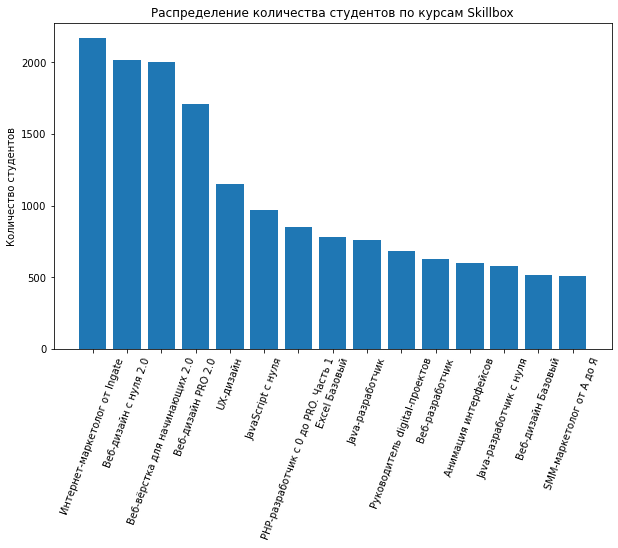

In [440]:
# bar-chart по количеству студентов на каждом курсе
fig, ax = plt.subplots(figsize=(10, 6))
plt.ylabel("Количество студентов")
plt.title("Распределение количества студентов по курсам Skillbox")
plt.xticks(rotation=70)
plt.bar(data=courses_students, x="title", height="student_id");

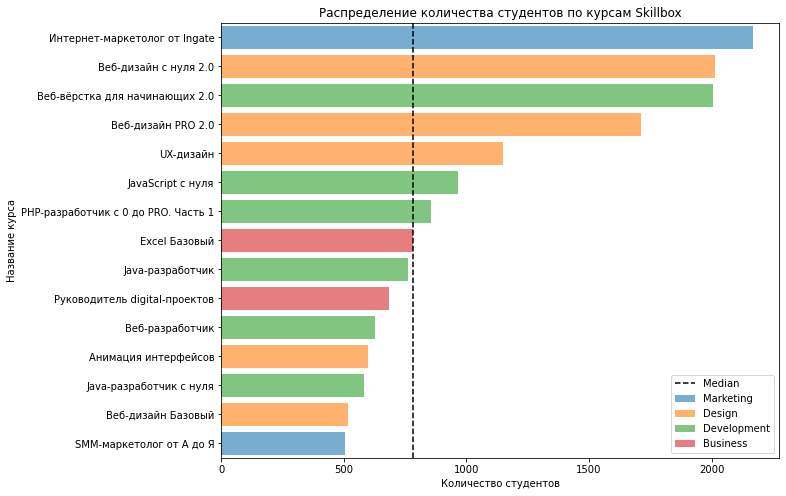

In [441]:
# Горизонтальный bar-chart по количеству студентов на каждом курсе
fig, ax = plt.subplots(figsize=(10, 8))
gr = sns.barplot(data=courses_students, x="student_id", y="title", orient="h", hue="field", dodge=False, saturation=1, alpha=0.6)
gr.set_xlabel("Количество студентов")
gr.set_ylabel("Название курса")
gr.set_title("Распределение количества студентов по курсам Skillbox")
median = courses_students["student_id"].median()
ax.axvline(x=median, color="black", linestyle="--", label="Median")
gr.legend();

## Выводы по п.1 

**Таким образом, первые результаты и выводы, которые мы можем сделать:**
* Общее количество курсов в Skillbox на момент 2019 года - 15

**Данные по возрастам студентов Skillbox (по каждому курсу в отдельности отражены в расчетахх):**  
Минимальный возраст студентов - 14 лет - минимально возможный возраст покупки того или иного курса.  
Верхний порог возраста студентов платформы не ограничен!  
Средний возраст студентов составляет 32 года.  
Медианный же составляет 31 год.  

Диапазон возрастов очень широкий, что говорит нам о большом разнообразии контингента платформы. Данные о средних и медианных возрастах (~30 лет) говорят нам о том, что, основная масса студентов учится с целью смены профессии либо профиля, получения новых для себя знаний в незнакомых или малознакомых областях.

Согласно визуализациям, основной интерес аудитории платформы направлен на сферы дизайна, разработки и маркетинга - количества студентов курсов, принадлежащих к данным сферам,  превышают медианное значение количества студентов по всем курсам. 

## 2. Расчет потенциальной нагрузки на преподавателей

### Рассчитаем прирост студентов на каждом курсе в каждом месяце за всю историю 

In [442]:
# Преобразуем в даты два столбца main: 
main["start_date"] = pd.to_datetime(main["start_date"])
main["finish_date"] = pd.to_datetime(main["finish_date"])

In [443]:
def drop_duplicates_group(group): 
    """Удаляет повторяющиеся значения студентов с целью поиска новых, 
    уникальных пользователей для каждого курса
    """
    return group.drop_duplicates(subset="student_id", keep="first")

In [444]:
fst_hws_df = main[main["is_homework"] == True]
fst_hws_df = main[["title", "student_id", "start_date"]].sort_values("start_date")

# Фильтрация
m = pd.DatetimeIndex(fst_hws_df["start_date"]).month
y = pd.DatetimeIndex(fst_hws_df["start_date"]).year
fst_hws_df["start_date"] = pd.to_datetime(y.astype(str) + "/" + m.astype(str))

# Прирост означает количество новых, то есть УНИКАЛЬНЫХ пользователей для курса по месяцам 
# Необходим датафрейм, включающий количество студентов на каждом курсе за каждый месяц, \
# по всем годам в отдельности

monthly_data = fst_hws_df.drop_duplicates(subset="student_id").groupby(
    ["title", "start_date"]
    ).count().rename(columns={"student_id" : "new_students_count"})
monthly_data

new_students_count
title                         start_date                    
Excel Базовый                 2018-01-01                   3
                              2018-02-01                   3
                              2018-03-01                   2
                              2018-05-01                   6
                              2018-06-01                  33
...                                                      ...
Руководитель digital-проектов 2019-03-01                  31
                              2019-04-01                  17
                              2019-05-01                  21
                              2019-06-01                  14
                              2019-07-01                  24

[252 rows x 1 columns]

In [445]:
monthly_data = monthly_data.reset_index() 

### Построим графики прироста студентов по каждому месяцу каждого года, для всех курсов 

In [446]:
def my_plot_courses(title_sample, xlabel, ylabel, xcolumn, ycolumn, is_rotate, df):
    """Строит 15 однотипных графиков для различных метрик"""

    fig, axs = plt.subplots(nrows=5, ncols=3, figsize=(22, 34))
    fig.suptitle(title_sample, y=0.895, fontsize="xx-large")

    title_count = 0
    for i in range(5): 
        for j in range(3):  
            data_to_plot = df[df["title"] == courses_titles[title_count]]
            sns.lineplot(data=data_to_plot, x=xcolumn, y=ycolumn, ax=axs[i, j]) # график 

            median = data_to_plot[ycolumn].median()
            axs[i, j].axhline(median, color="green", linestyle="-", label="median") # медиана
            axs[i, j].set_title(courses_titles[title_count])
            axs[i, j].legend()

            if is_rotate: 
                axs[i, j].tick_params(axis="x", labelrotation=30)

            if i == 4:
                axs[i, j].set_xlabel(xlabel)
            else:
                axs[i, j].set_xlabel("")

            if j in range(0, 13, 3):
                axs[i, j].set_ylabel(ylabel)
            else: 
                axs[i, j].set_ylabel("")

            title_count += 1


courses_titles = list(main.title.unique())

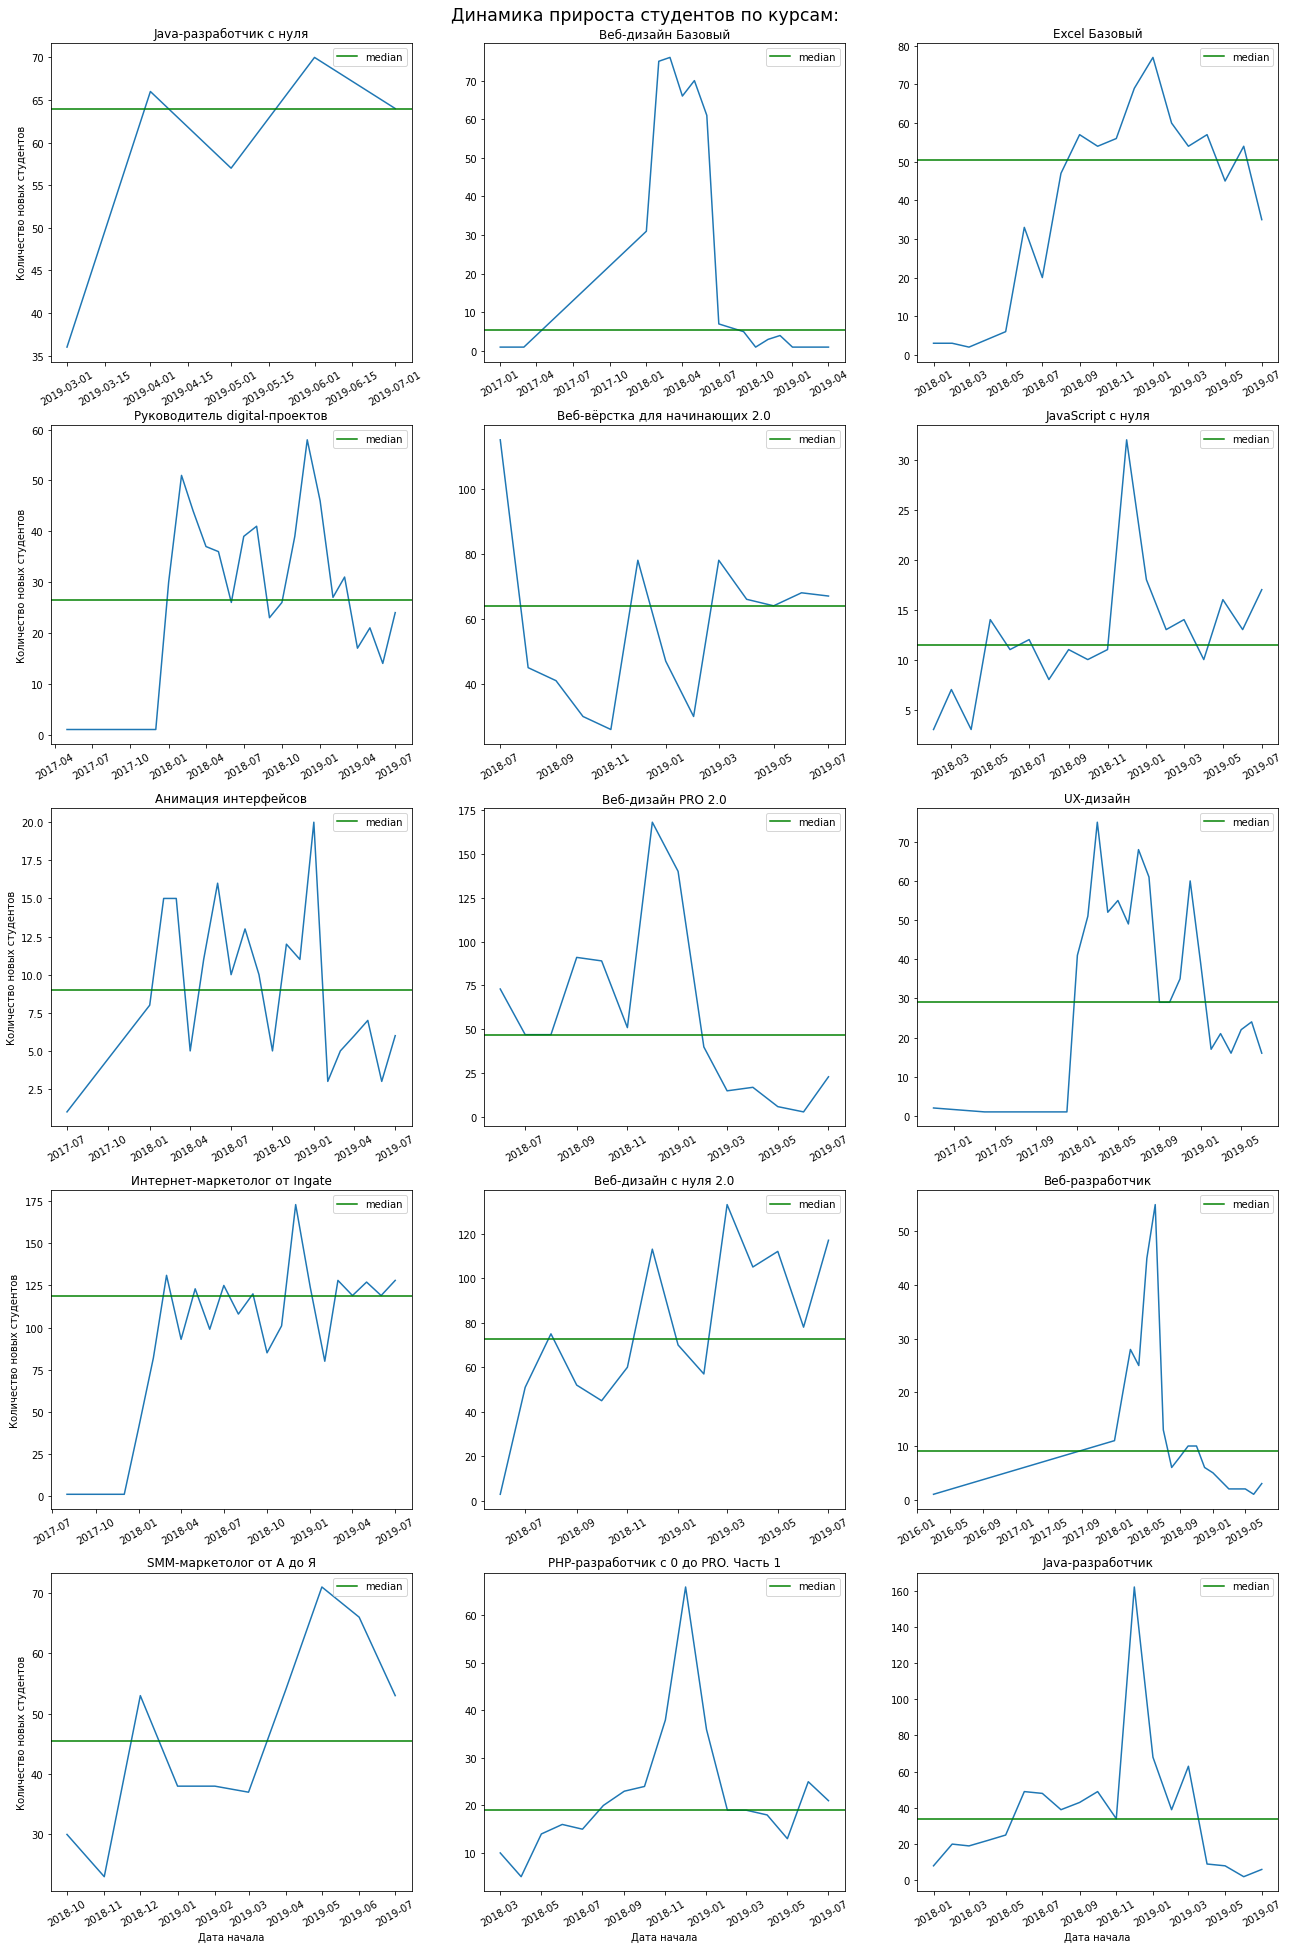

In [447]:
my_plot_courses(
    title_sample="Динамика прироста студентов по курсам:", 
    xlabel="Дата начала", 
    ylabel="Количество новых студентов", 
    df=monthly_data,
    xcolumn="start_date", 
    ycolumn="new_students_count", 
    is_rotate=True
)

### Построим общий график прироста студентов в каждом месяце для каждого курса

In [448]:
# Получаем цвета для графика: 
cmap = plt.cm.get_cmap("tab20b")
colors = cmap.colors

Text(0.5, 1.0, 'Прирост студентов в каждом месяце для каждого курса')

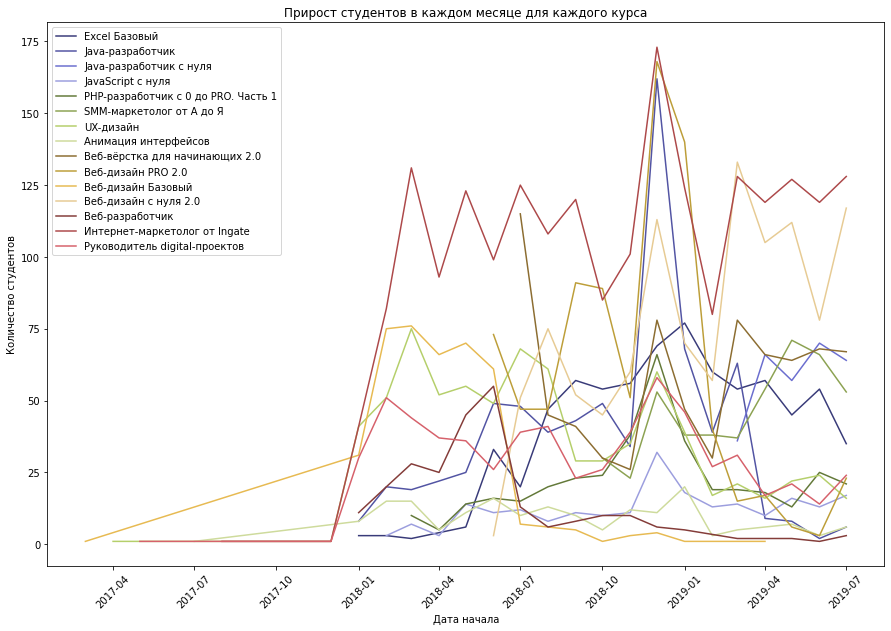

In [449]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.set_prop_cycle(color=colors)
ax.set_xlabel("Дата начала")
ax.set_ylabel("Количество студентов")
plt.xticks(rotation=45)
for title in monthly_data["title"].unique(): 
    data_to_plot = monthly_data[(monthly_data["title"] == title) & (monthly_data["start_date"] > pd.to_datetime("2017-01-01"))]
    plt.plot(data_to_plot["start_date"], data_to_plot["new_students_count"], label=title)
plt.legend()
ax.set_title("Прирост студентов в каждом месяце для каждого курса")

### Рассчитаем количество прогрессов по выполнению домашних работ в каждом месяце за всю историю для каждого курса.

In [450]:
def work_date_column(row):
    """ Для генерации нового столбца периода работы над ДЗ, учитывает записи со всеми статусами  
    """

    if row.months_range >= 1: 
        return pd.date_range(start=row.start_date, end=row.finish_date, freq="M")
    elif row.status == "start":  
        return pd.date_range(start=row.start_date, end=progresses_df["finish_date"].max(), freq="M")
    elif row.finish_date.month != row.start_date.month: 
        return [row.start_date, row.finish_date]
    else: 
        return row.finish_date

In [451]:
# Фильтрация
progresses_df = main[main["is_homework"] == True][
    ["title", "progress_id", "start_date", "finish_date", "status"]
    ].sort_values("start_date")
    
# 1. Добавить столбец с количеством n месяцев, которое заняла работа: 
progresses_df["months_range"] = round((progresses_df["finish_date"] - progresses_df["start_date"]).dt.days/30, 2)

# 1. Для каждой записи по прогрессу создать столбец, содержащий список дат, которые эта работа выполнялась \
# (с помощью date_range)
progresses_df["work_date"] = progresses_df.apply(
    axis=1, 
    func=work_date_column
) 

# 2. Разобрать эти списки через explode
progresses_df = progresses_df.explode("work_date")[["title", "progress_id", "work_date", "status"]].dropna()

# 3. Работать уже с этим датафреймом, добавить к нему месяца и года (для графиков). 
y = pd.DatetimeIndex(progresses_df["work_date"]).month.astype(int)
m = pd.DatetimeIndex(progresses_df["work_date"]).year.astype(int)
progresses_df["work_date"] = pd.to_datetime(y.astype(str) + "/" + m.astype(str))

progresses_df_counted = progresses_df.groupby(["title", "work_date"]).count().reset_index()

In [452]:
progresses_df_counted[progresses_df_counted["title"] == "Excel Базовый"].sort_values("work_date").head(5)

,title,work_date,progress_id,status
0,Excel Базовый,2018-02-01,37,37
1,Excel Базовый,2018-03-01,9,9
2,Excel Базовый,2018-04-01,15,15
3,Excel Базовый,2018-05-01,20,20
4,Excel Базовый,2018-06-01,40,40


### Построим графики количества прогрессов по выполнению домашних работ в каждом месяце за всю историю для каждого курса.

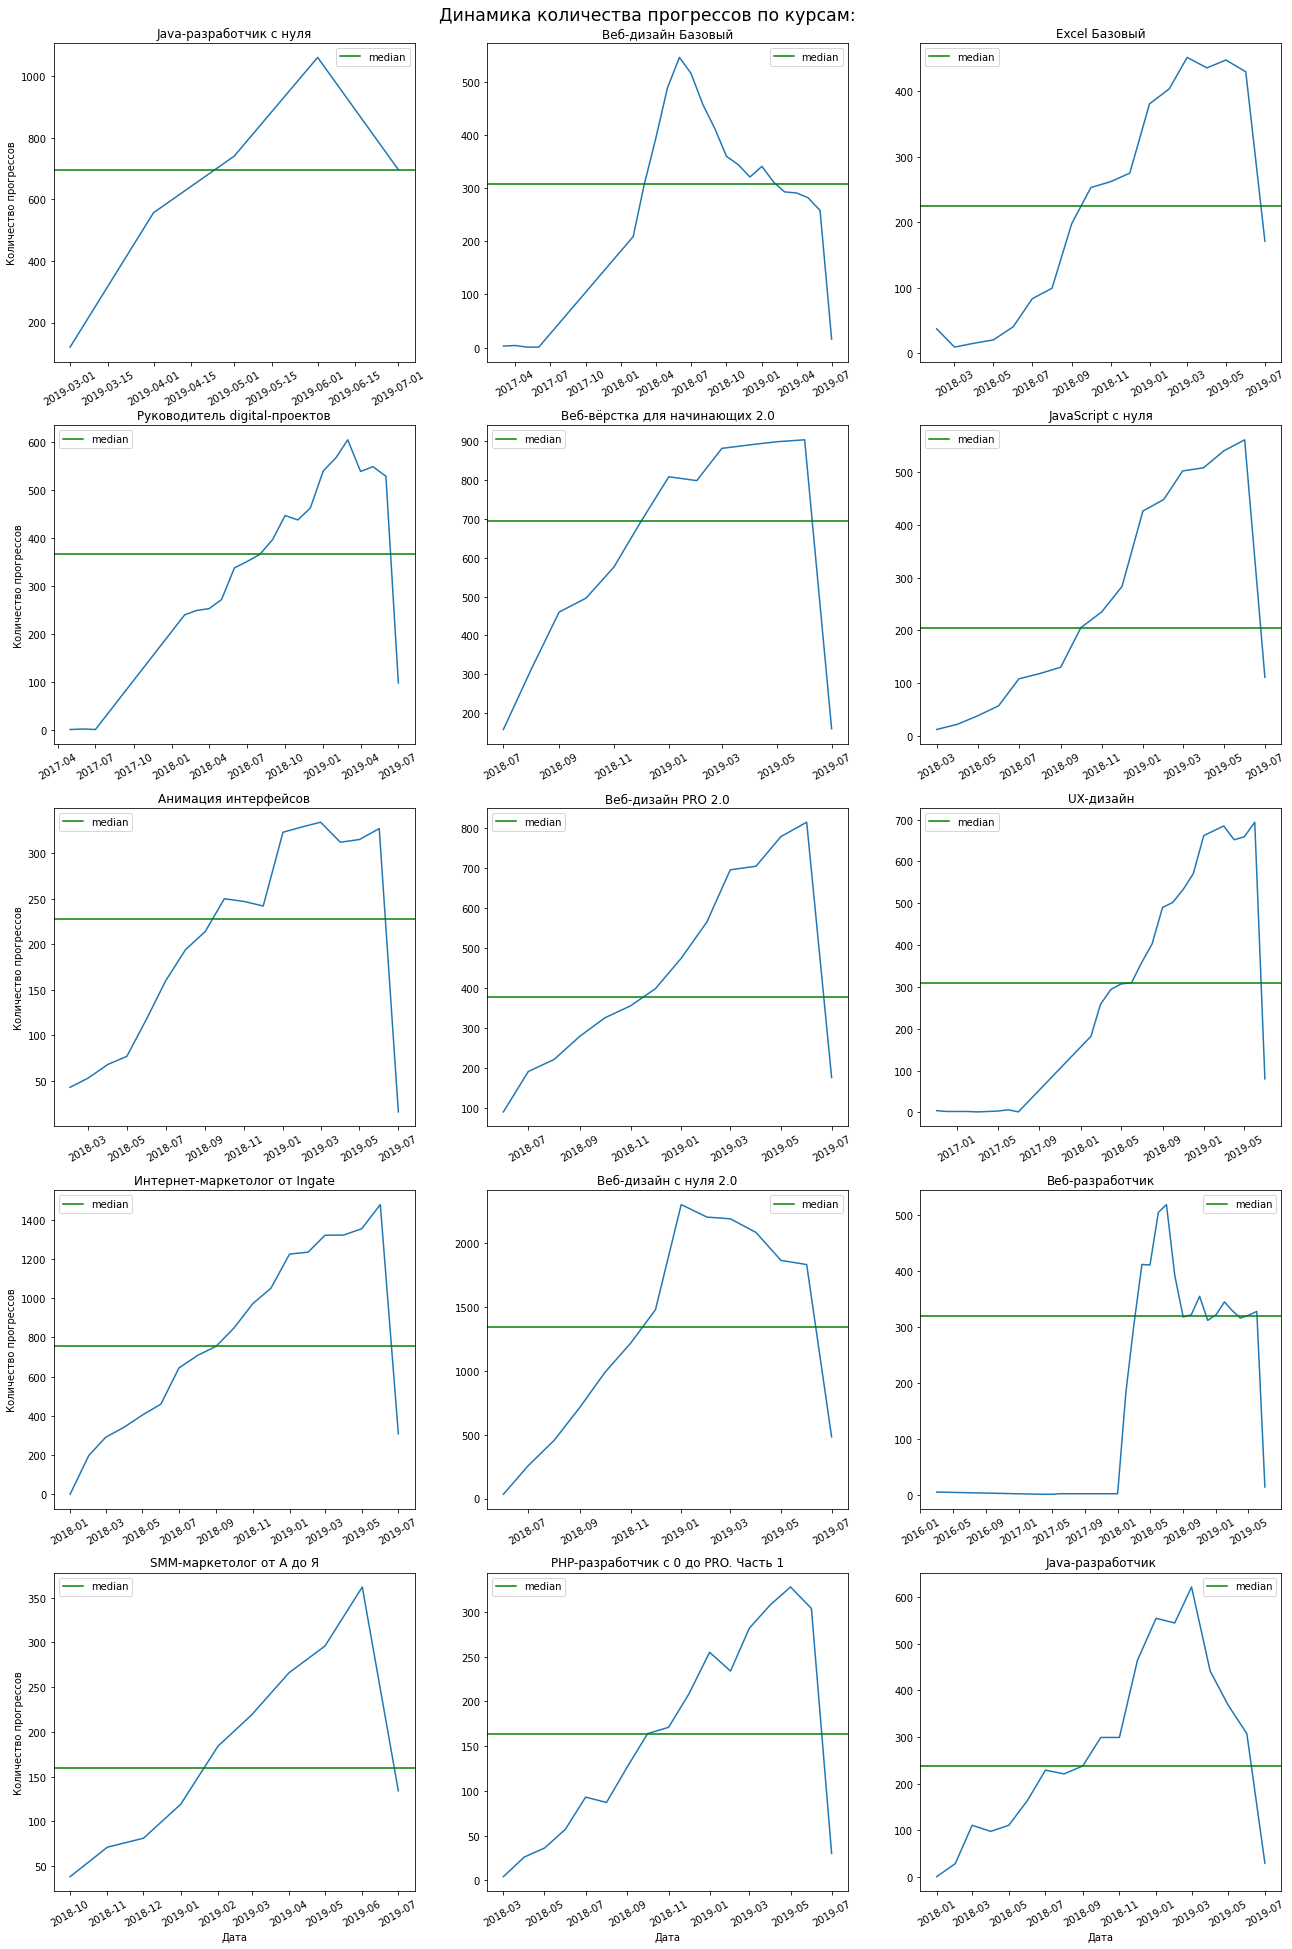

In [453]:
my_plot_courses(
    title_sample="Динамика количества прогрессов по курсам:", 
    xlabel="Дата",
    ylabel="Количество прогрессов", 
    xcolumn="work_date", 
    ycolumn="progress_id", 
    df=progresses_df_counted, 
    is_rotate=True
)

### Построим общий график количества прогрессов по выполнению домашних работ в каждом месяце за всю историю для каждого курса.

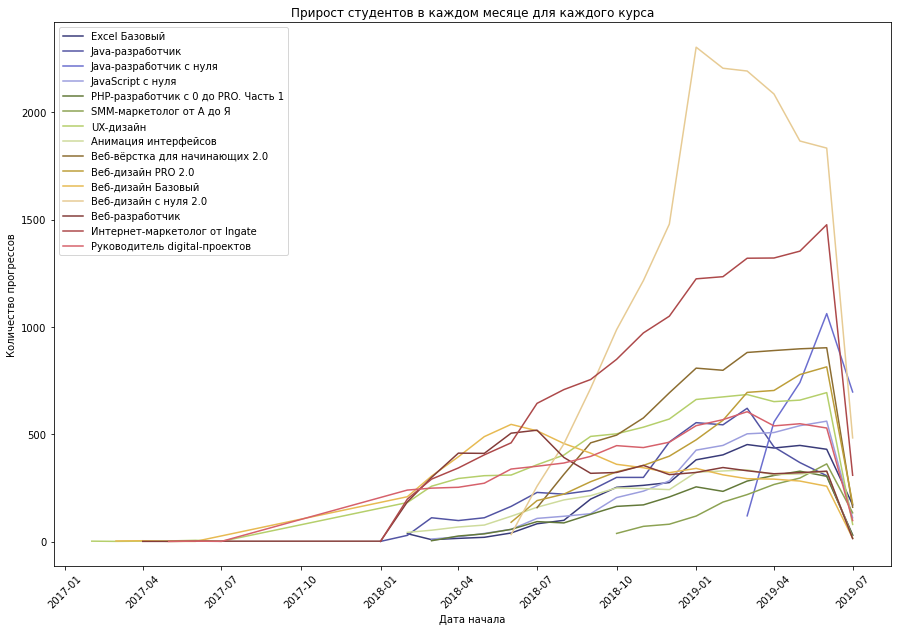

In [454]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.set_prop_cycle(color=colors)
ax.set_xlabel("Дата начала")
ax.set_ylabel("Количество прогрессов")
plt.xticks(rotation=45)
for title in progresses_df_counted["title"].unique(): 
    data_to_plot = progresses_df_counted[(progresses_df_counted["title"] == title) & (progresses_df_counted["work_date"] > pd.to_datetime("2017-01-01"))] # 
    plt.plot(data_to_plot["work_date"], data_to_plot["progress_id"], label=title)
plt.legend()
ax.set_title("Прирост студентов в каждом месяце для каждого курса");

### Выводы на основании рассчитанных данных:  
Проанализировав графики для каждого курса, можно сделать следующие выводы относительно количества новых студентов на курсах: 
* В начале 2019 года произошел резкий скачок интереса к курсам категории "разработка", однако этот скачок был непродолжительным.
* В среднем по всем курсам ежемесячная динамика количества новых пользователей колеблется вокруг медианного значения по всем месяцам. Однако, разброс по каждому месяцу оказывается довольно большой. То есть, динамика оказывается очень нестабильной. 

Выводы относительно количества прогрессов, соответствущей нагрузки на преподавателей: 
* Количество выаполняемых работ по всем курсам стабильно увеличивается с каждым месяцем. На практике это означает увеличение нагрузки на преподавателей и увеличение объема их работы. Как следствие, возникает необходимость в расширении штата. 
* Причины увеличения количества выполняемых работ - общий рост количества студентов на курсах, а также тот факт, что некоторые работы не выполняются сразу. 


## 3. Выявление проблемных модулей

### Рассчитаем минимальное, максимальное, среднее, медианное время прохождения каждого модуля.

In [455]:
# Формируем датафрейм с датами начала и конца прохождения каждым студентом каждого модуля для каждого курса
modules_time_df = main.groupby(["title", "student_id", "module_number"])[["start_date"]].min()
modules_time_df["finish_date"] = main.groupby(["title", "student_id", "module_number"])["start_date"].max()
modules_time_df["delta_time"] = modules_time_df["finish_date"] - modules_time_df["start_date"] 

Для проверки данных на адекватность будем считать, что время прохождения модуля не может быть менее 5 минут: 

In [456]:
modules_time_df = modules_time_df[modules_time_df["delta_time"] > pd.Timedelta("5 minutes")]

Минимальное время прохождения каждого модуля: 

In [457]:
min_times = modules_time_df.groupby(["title", "module_number"])["delta_time"].agg("min").reset_index()
min_times

,title,module_number,delta_time
0,Excel Базовый,1,0 days 00:11:15.636400
1,Excel Базовый,2,0 days 00:21:16.479379
2,Excel Базовый,3,0 days 00:06:10.696454
3,Excel Базовый,4,0 days 00:05:13.602744
4,Excel Базовый,5,0 days 00:09:45.310713
...,...,...,...
189,Руководитель digital-проектов,13,0 days 00:19:28.671954
190,Руководитель digital-проектов,14,0 days 00:08:14.286036
191,Руководитель digital-проектов,15,0 days 00:48:33.335149
192,Руководитель digital-проектов,16,0 days 02:27:14.075767


Максимальное время прохождения каждого модуля: 

In [458]:
max_times = modules_time_df.groupby(["title", "module_number"])["delta_time"].agg("max").reset_index()
max_times

,title,module_number,delta_time
0,Excel Базовый,1,390 days 04:42:37.632061
1,Excel Базовый,2,274 days 04:19:43.379124
2,Excel Базовый,3,139 days 05:55:31.895203
3,Excel Базовый,4,485 days 00:55:20.934761
4,Excel Базовый,5,289 days 01:26:25.522455
...,...,...,...
189,Руководитель digital-проектов,13,210 days 09:23:14.740709
190,Руководитель digital-проектов,14,189 days 21:04:19.541692
191,Руководитель digital-проектов,15,71 days 16:33:59.569169
192,Руководитель digital-проектов,16,33 days 17:55:23.437655


Среднее время прохождения каждого модуля: 

In [459]:
mean_times = modules_time_df.groupby(["title", "module_number"])["delta_time"].agg("mean").reset_index()
mean_times

,title,module_number,delta_time
0,Excel Базовый,1,22 days 12:13:38.083814222
1,Excel Базовый,2,7 days 21:41:05.298519253
2,Excel Базовый,3,4 days 18:32:17.339785843
3,Excel Базовый,4,25 days 15:01:46.095243150
4,Excel Базовый,5,8 days 05:04:01.091179149
...,...,...,...
189,Руководитель digital-проектов,13,15 days 03:11:26.195759253
190,Руководитель digital-проектов,14,10 days 10:14:26.322165343
191,Руководитель digital-проектов,15,5 days 15:09:21.739694689
192,Руководитель digital-проектов,16,6 days 09:17:47.788160400


Медианное время прохождения каждого модуля: 

In [460]:
median_times = modules_time_df.groupby(["title", "module_number"])["delta_time"].agg("median").reset_index()
median_times

,title,module_number,delta_time
0,Excel Базовый,1,6 days 00:43:42.182710
1,Excel Базовый,2,1 days 22:06:46.439888
2,Excel Базовый,3,0 days 23:59:28.300480
3,Excel Базовый,4,3 days 12:27:57.376385
4,Excel Базовый,5,1 days 06:17:07.748152
...,...,...,...
189,Руководитель digital-проектов,13,4 days 02:28:04.855191
190,Руководитель digital-проектов,14,3 days 20:20:33.757283
191,Руководитель digital-проектов,15,1 days 22:48:39.457630
192,Руководитель digital-проектов,16,3 days 02:15:15.568098


### Построим line-graph с медианным временем прохождения каждого модуля для каждого курса.

In [461]:
median_times_df = median_times
median_times_df["hours"] = round(median_times_df["delta_time"]/dt.timedelta(hours=1))
modules_time_df["hours"] = round(modules_time_df["delta_time"]/dt.timedelta(hours=1))
median_times_df

,title,module_number,delta_time,hours
0,Excel Базовый,1,6 days 00:43:42.182710,145.0
1,Excel Базовый,2,1 days 22:06:46.439888,46.0
2,Excel Базовый,3,0 days 23:59:28.300480,24.0
3,Excel Базовый,4,3 days 12:27:57.376385,84.0
4,Excel Базовый,5,1 days 06:17:07.748152,30.0
...,...,...,...,...
189,Руководитель digital-проектов,13,4 days 02:28:04.855191,98.0
190,Руководитель digital-проектов,14,3 days 20:20:33.757283,92.0
191,Руководитель digital-проектов,15,1 days 22:48:39.457630,47.0
192,Руководитель digital-проектов,16,3 days 02:15:15.568098,74.0


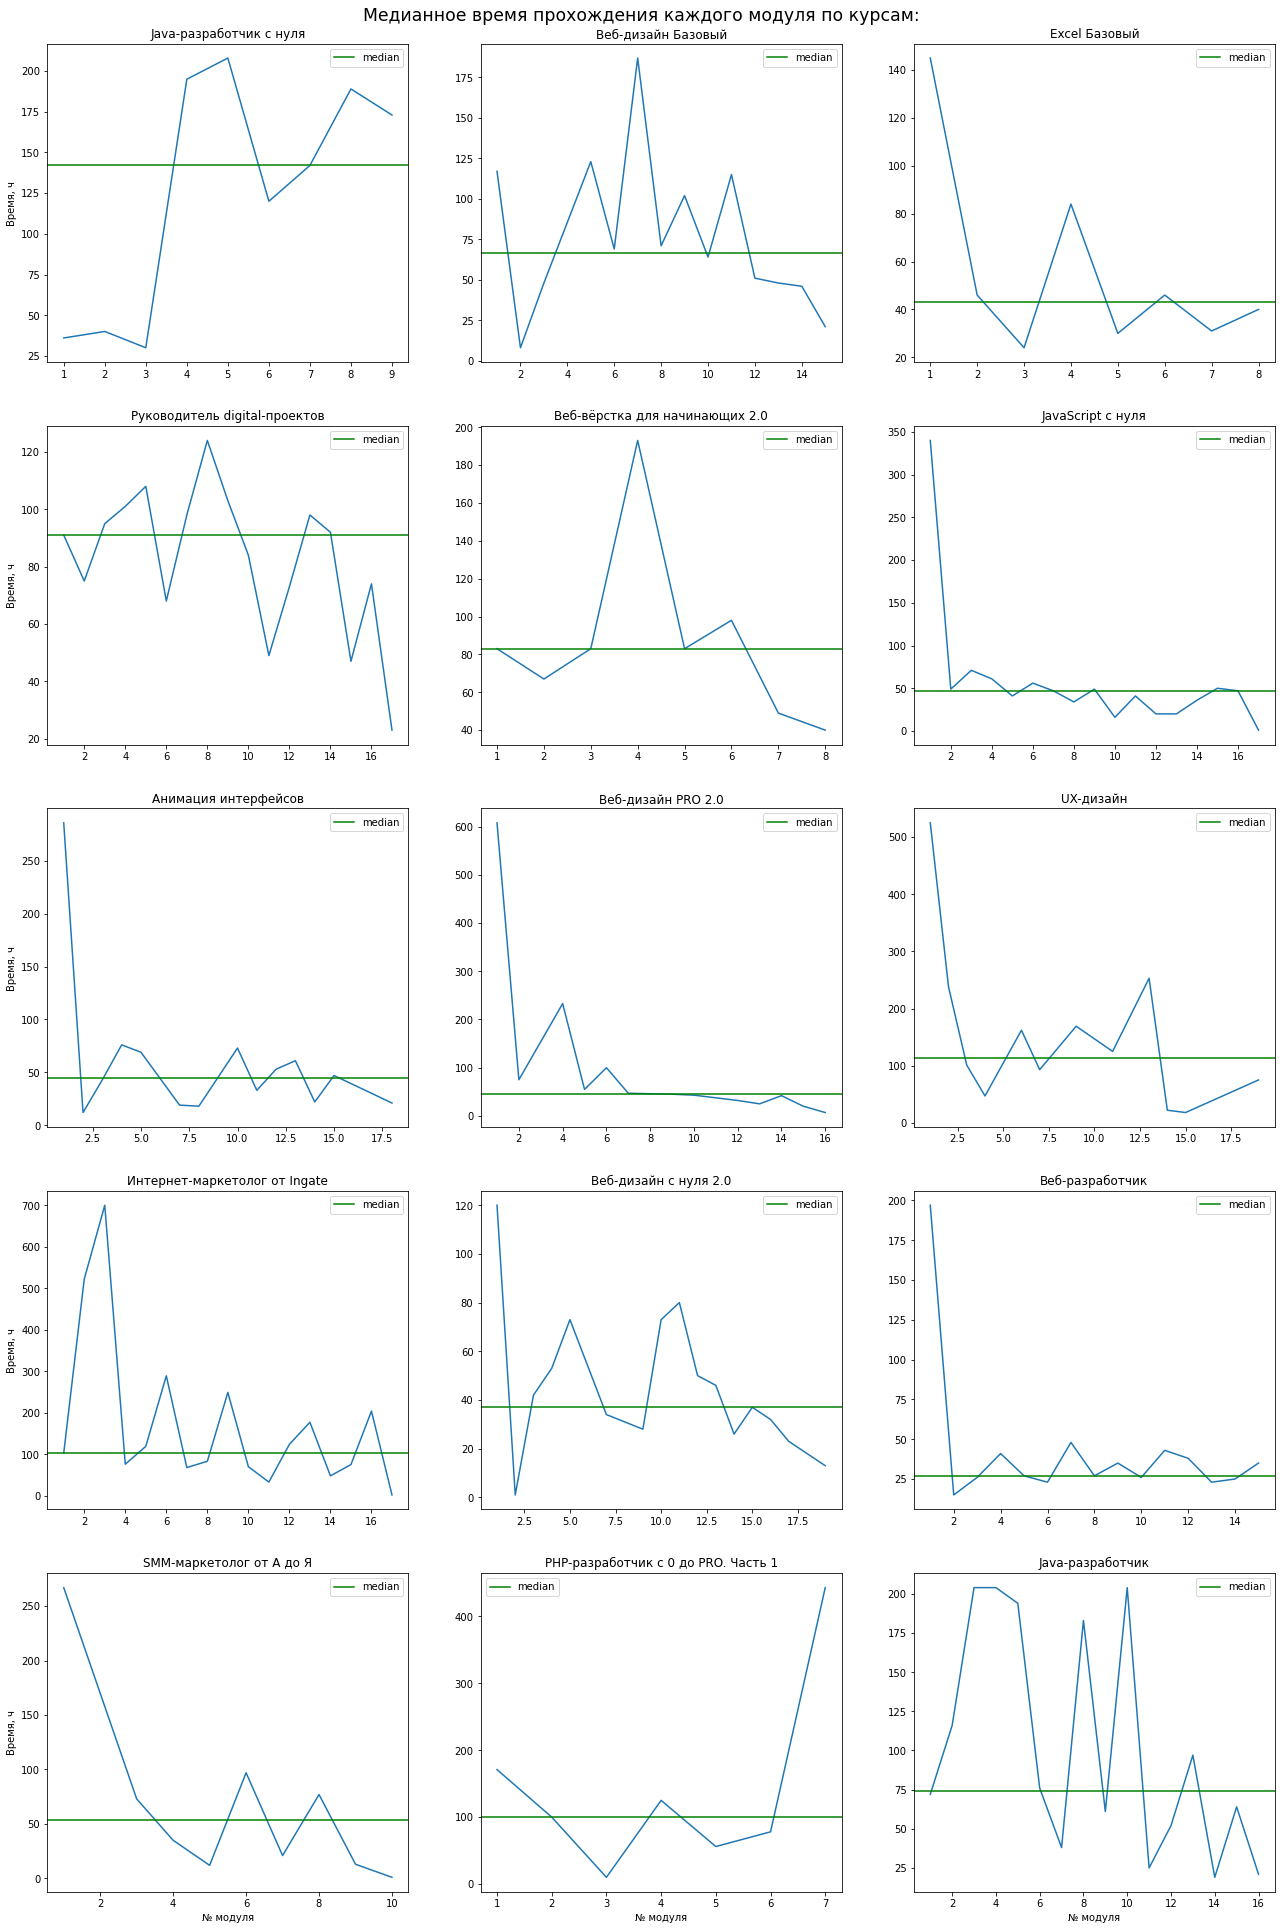

In [462]:
my_plot_courses(
    title_sample="Медианное время прохождения каждого модуля по курсам:", 
    xlabel="№ модуля", 
    ylabel="Время, ч", 
    xcolumn="module_number", 
    ycolumn="hours", 
    df=median_times_df,
    is_rotate=False
)

Рассмотрим медианное время прохождения всех модулей всех курсов (в днях): 

In [463]:
median_time_all = median_times_df["hours"].median()/24
median_time_all

2.4375

#### Промежуточные выводы на основании рассмотренных значений: 
* Медианное время прохождения всех модулей для всех курсов - 2 дня. Среднее - 13 дней. Таким образом, основная масса студентов выполняет домашние задания за 1-2 недели.  
* Для 8 из 15 курсов первые 3 модуля являются наиболее проблемными. Это, скорее всего, связано с тем, что пользователь не всегда сразу по приобретении курса начинает его прохождение, или вовсе оставляет неначатым. 
* Существует группа курсов, в которой после преодоления первого модуля время прохождения студентами последующих модулей стабильно, и колеблется вокруг медианного значения для конкретного курса. Это означает, что студенты успешно справляются с прохождением модулей, сохраняя периодичность выполнения заданий. К таким курсам относятся: "Excel Базовый", "JavaScript с нуля", "Анимация интерфейсов", "Веб-дизайн PRO 2.0", "UX-дизайн", "Интернет-маркетолог от Ingate", "Веб-дизайн с нуля 2.0", "Веб-разработчик", "SMM-маркетолог от А до Я".
* Рассматриваем группу, в которой (не на начальных стадиях прохождения курса) присутствуют проблемные модули, сильно выделяющиеся либо разнящиеся по сложности. Это: "Java-разработчик с нуля", "Веб-дизайн Базовый", "Руководитель Digital-проектов", "Веб-вёрстка для начинающих 2.0", "Java-разработчик". 
* Информация о самых проблемных модулях для каждого курса в частности отражена на графиках. 
* К самым времязатратным курсам (судя по медианному значению времени прохождения конкретного модуля) относятся: "Java-разработчик с нуля" (~150 часов/модуль); "UX-дизайн" (~120 часов/модуль)

### Чтобы выявить сезонность, посчитаем медианное время выполнения домашней работы по месяцам (пункт 3.3).
Наша задача - определить медианное время, затрачиваемое на выполнение домашней работы, начинаемой в конкретном месяце, для любых модулей всех курсов. 

In [464]:
# Формируем необходимый датафрейм: 
modules_time_df["start_month"] = [date.month for date in modules_time_df["start_date"]]
median_per_month_df = modules_time_df.reset_index()
median_per_month_df = median_per_month_df.groupby(["title", "start_month"])[["hours"]].agg("median").rename(columns={"hours" : "median_hours"}).reset_index()
median_per_month_df.head()

,title,start_month,median_hours
0,Excel Базовый,1,57.0
1,Excel Базовый,2,69.0
2,Excel Базовый,3,28.0
3,Excel Базовый,4,45.0
4,Excel Базовый,5,27.0


### Строим общий график для каждого курса с медианным временем выполнения домашней работы по месяцам.

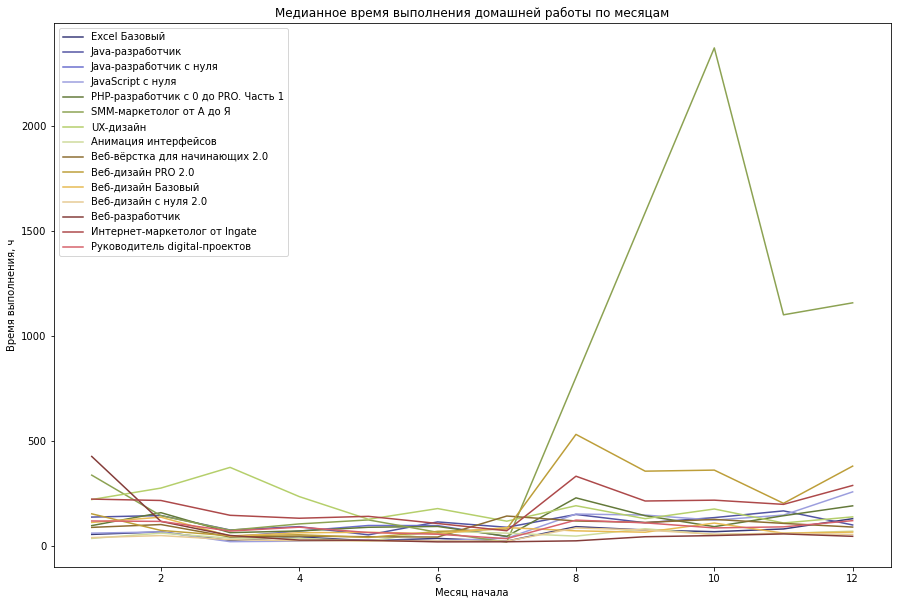

In [465]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.set_prop_cycle(color=colors)
ax.set_xlabel("Месяц начала")
ax.set_ylabel("Время выполнения, ч")
for title in median_per_month_df.title.unique(): 
    data_to_plot = median_per_month_df[(median_per_month_df["title"] == title)] 
    plt.plot(data_to_plot["start_month"], data_to_plot["median_hours"], label=title)
plt.legend()
ax.set_title("Медианное время выполнения домашней работы по месяцам");

Для наглядности ограничим область построения графика: 

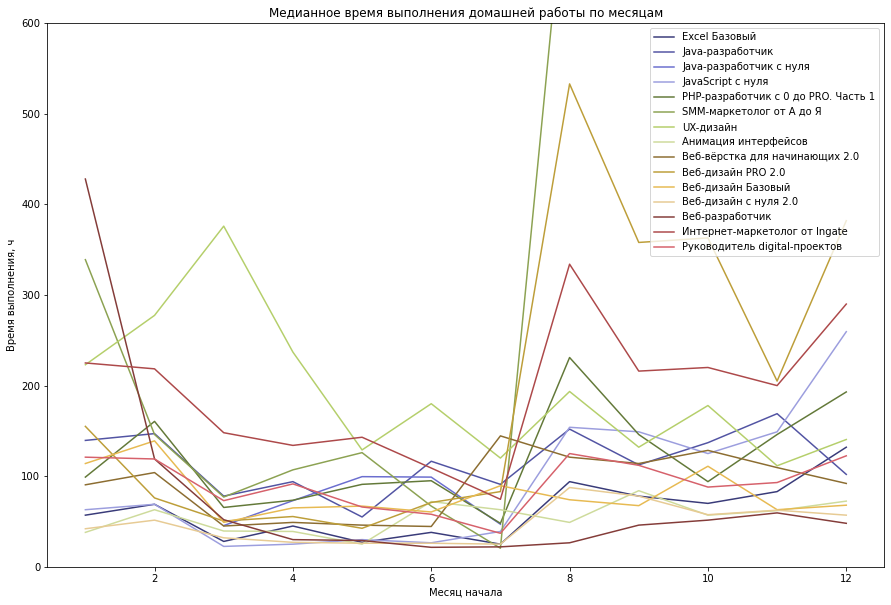

In [466]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.set_prop_cycle(color=colors)
ax.set_xlabel("Месяц начала")
ax.set_ylabel("Время выполнения, ч")

for title in median_per_month_df.title.unique(): 
    data_to_plot = median_per_month_df[(median_per_month_df["title"] == title)] 
    plt.plot(data_to_plot["start_month"], data_to_plot["median_hours"], label=title)
plt.legend()
ax.set(ylim=(0, 600))
ax.set_title("Медианное время выполнения домашней работы по месяцам");


### Аналитический вывод в виде тезисов на основании рассчитанных значений: 
* Медианное время прохождения конкретного модуля курса - 2.5 дня. Среднее - 13 дней. Таким образом, в среднем студенты выделяют 1 неделю на модуль.   
* Первый модуль по длительности прохождения является наиболее проблемным. 
* Большое количество студентов, не начинающих или откладывающих обучение. 
* Самые стабильные по времени прохождения курсы: "Excel Базовый", "JavaScript с нуля", "Анимация интерфейсов", "Веб-дизайн PRO 2.0", "UX-дизайн", "Интернет-маркетолог от Ingate", "Веб-дизайн с нуля 2.0", "Веб-разработчик", "SMM-маркетолог от А до Я".
* Самые нестабильные по сложности: "Java-разработчик с нуля", "Веб-дизайн Базовый", "Руководитель Digital-проектов", "Веб-вёрстка для начинающих 2.0", "Java-разработчик".
* Самые времязатратные курсы: "Java-разработчик с нуля", "UX-дизайн".  
* Самое продуктивное для студентов время учебы - период с февраля по июль. Его можно рассматривать как самый благоприятный для приобретения студентами новых знаний, когда они более активны и замотивированы. Как следствие, в этот период для компании выше шансы повысить конверсию продаж. 

## 4. Расчет конверсии

### Рассчитаем конверсию перехода студентов из одного модуля в другой на каждом курсе.

In [467]:
# Формируем датафрейм, содержащий: кол-во студентов, начавших ДЗ по каждому модулю (students_count), кол-во студентов, сдавших дз по модулю(hw_true)\
# изменение кол-ва студентов, сдавших ДЗ, в процентах для каждого модуля (hws_true_pct_change, %) 
conversion_df = main[main["is_homework"]==True].groupby(["field", "title", "module_number", "module_title"])[["student_id"]].count().rename(columns={"student_id" : "students_count"})
conversion_df["hw_true"] = main[(main["is_homework"]==True) & (main["status"] == "done")].groupby(["field", "title", "module_number"])[["student_id"]].count()
conversion_df["hw_true"] = conversion_df["hw_true"].shift()
conversion_df["hws_conversion"] = round(conversion_df['students_count'] / conversion_df["hw_true"], 4)
conversion_df = conversion_df.dropna().reset_index()
conversion_df = conversion_df[conversion_df["module_number"] != 1]

In [468]:
conversion_df.head()

,field,title,module_number,module_title,students_count,hw_true,hws_conversion
0,Business,Excel Базовый,2,Основной функционал Excel (продолжение),434,458.0,0.9476
1,Business,Excel Базовый,3,Формулы и функции Excel. Введение,398,406.0,0.9803
2,Business,Excel Базовый,4,Формулы и функции Excel. Продолжаем работать с...,345,387.0,0.8915
3,Business,Excel Базовый,5,Формулы и функции Excel. Более сложные формулы,298,303.0,0.9835
4,Business,Excel Базовый,6,"Формулы и функции Excel. Работа с ошибками, пр...",263,270.0,0.9741


### Построим bar-chart, отражающий рассчитанную информацию.

In [469]:
def barplot_courses(title_sample, xlabel, ylabel, xcolumn, ycolumn, is_rotate, df):
    """Строит 15 однотипных bar-chart.  """

    fig, axs = plt.subplots(nrows=5, ncols=3, figsize=(22, 34))
    fig.suptitle(title_sample, y=0.895, fontsize="xx-large")

    title_count = 0
    for i in range(5): 
        for j in range(3):  
            data_to_plot = df[df["title"] == courses_titles[title_count]]
            sns.barplot(data=data_to_plot, x=xcolumn, y=ycolumn, ax=axs[i, j], palette="hls", orient="v")
            axs[i, j].set_title(courses_titles[title_count])

            if is_rotate: 
                axs[i, j].tick_params(axis="x", labelrotation=30)

            if i == 4:
                axs[i, j].set_xlabel(xlabel)
            else:
                axs[i, j].set_xlabel("")

            if j in range(0, 13, 3):
                axs[i, j].set_ylabel(ylabel)
            else: 
                axs[i, j].set_ylabel("")

            title_count += 1

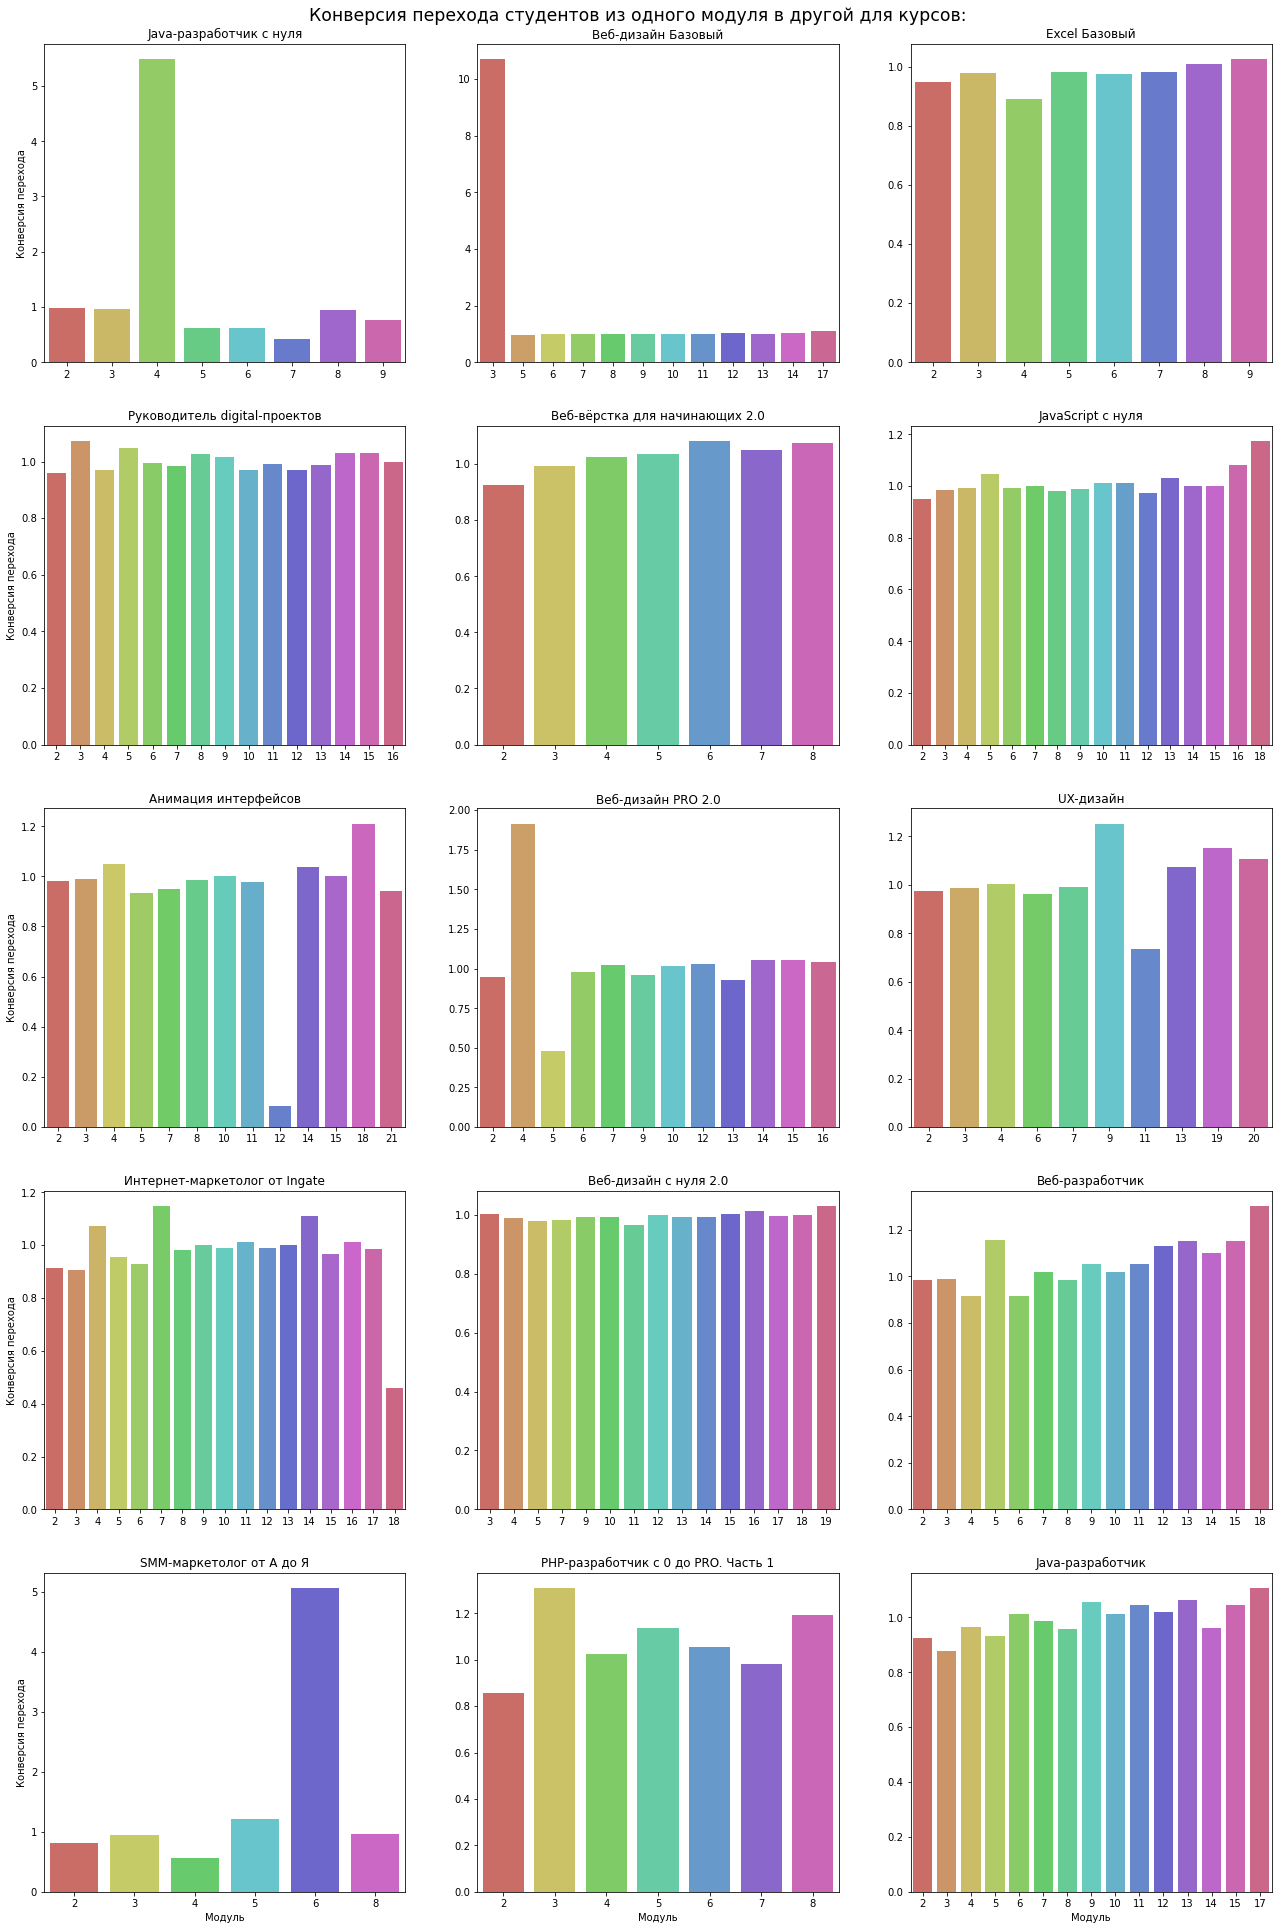

In [470]:
# sns.color_palette("hls", 8)
barplot_courses(
    title_sample="Конверсия перехода студентов из одного модуля в другой для курсов:", 
    xlabel="Модуль", 
    ylabel="Конверсия перехода", 
    xcolumn="module_number", 
    ycolumn="hws_conversion", 
    df=conversion_df,
    is_rotate=False
)

### Построим горизонтальный bar-chart, отражающий конверсию перехода студентов из одного модуля в другой на каждом курсе.

In [471]:
def barplot_courses2(title_sample, xlabel, ylabel, xcolumn, ycolumn, is_rotate, df):
    """Строит 15 однотипных bar-chart, задание 3 """

    fig, axs = plt.subplots(nrows=5, ncols=3, figsize=(22, 34))
    fig.suptitle(title_sample, y=0.905, fontsize="xx-large")

    title_count = 0

    sns.despine(left=True, bottom=True)
    for i in range(5): 
        for j in range(3):  
            data_to_plot = df[df["title"] == courses_titles[title_count]]

            sns.barplot(data=data_to_plot, x=xcolumn, y=ycolumn, ax=axs[i, j], orient="h", alpha=0.5, palette="husl")
            axs[i, j].set_title("Сфера: " + str(data_to_plot["field"].values[0]) + "\n" + courses_titles[title_count]) 


            median = data_to_plot[xcolumn].median()
            axs[i, j].axvline(x=median, color="g", linestyle="-")


            if is_rotate: 
                axs[i, j].tick_params(axis="x", labelrotation=30)

            if i == 4:
                axs[i, j].set_xlabel(xlabel)
            else:
                axs[i, j].set_xlabel("")

            if j in range(0, 13, 3):
                axs[i, j].set_ylabel(ylabel)
            else: 
                axs[i, j].set_ylabel("")

            title_count += 1
    

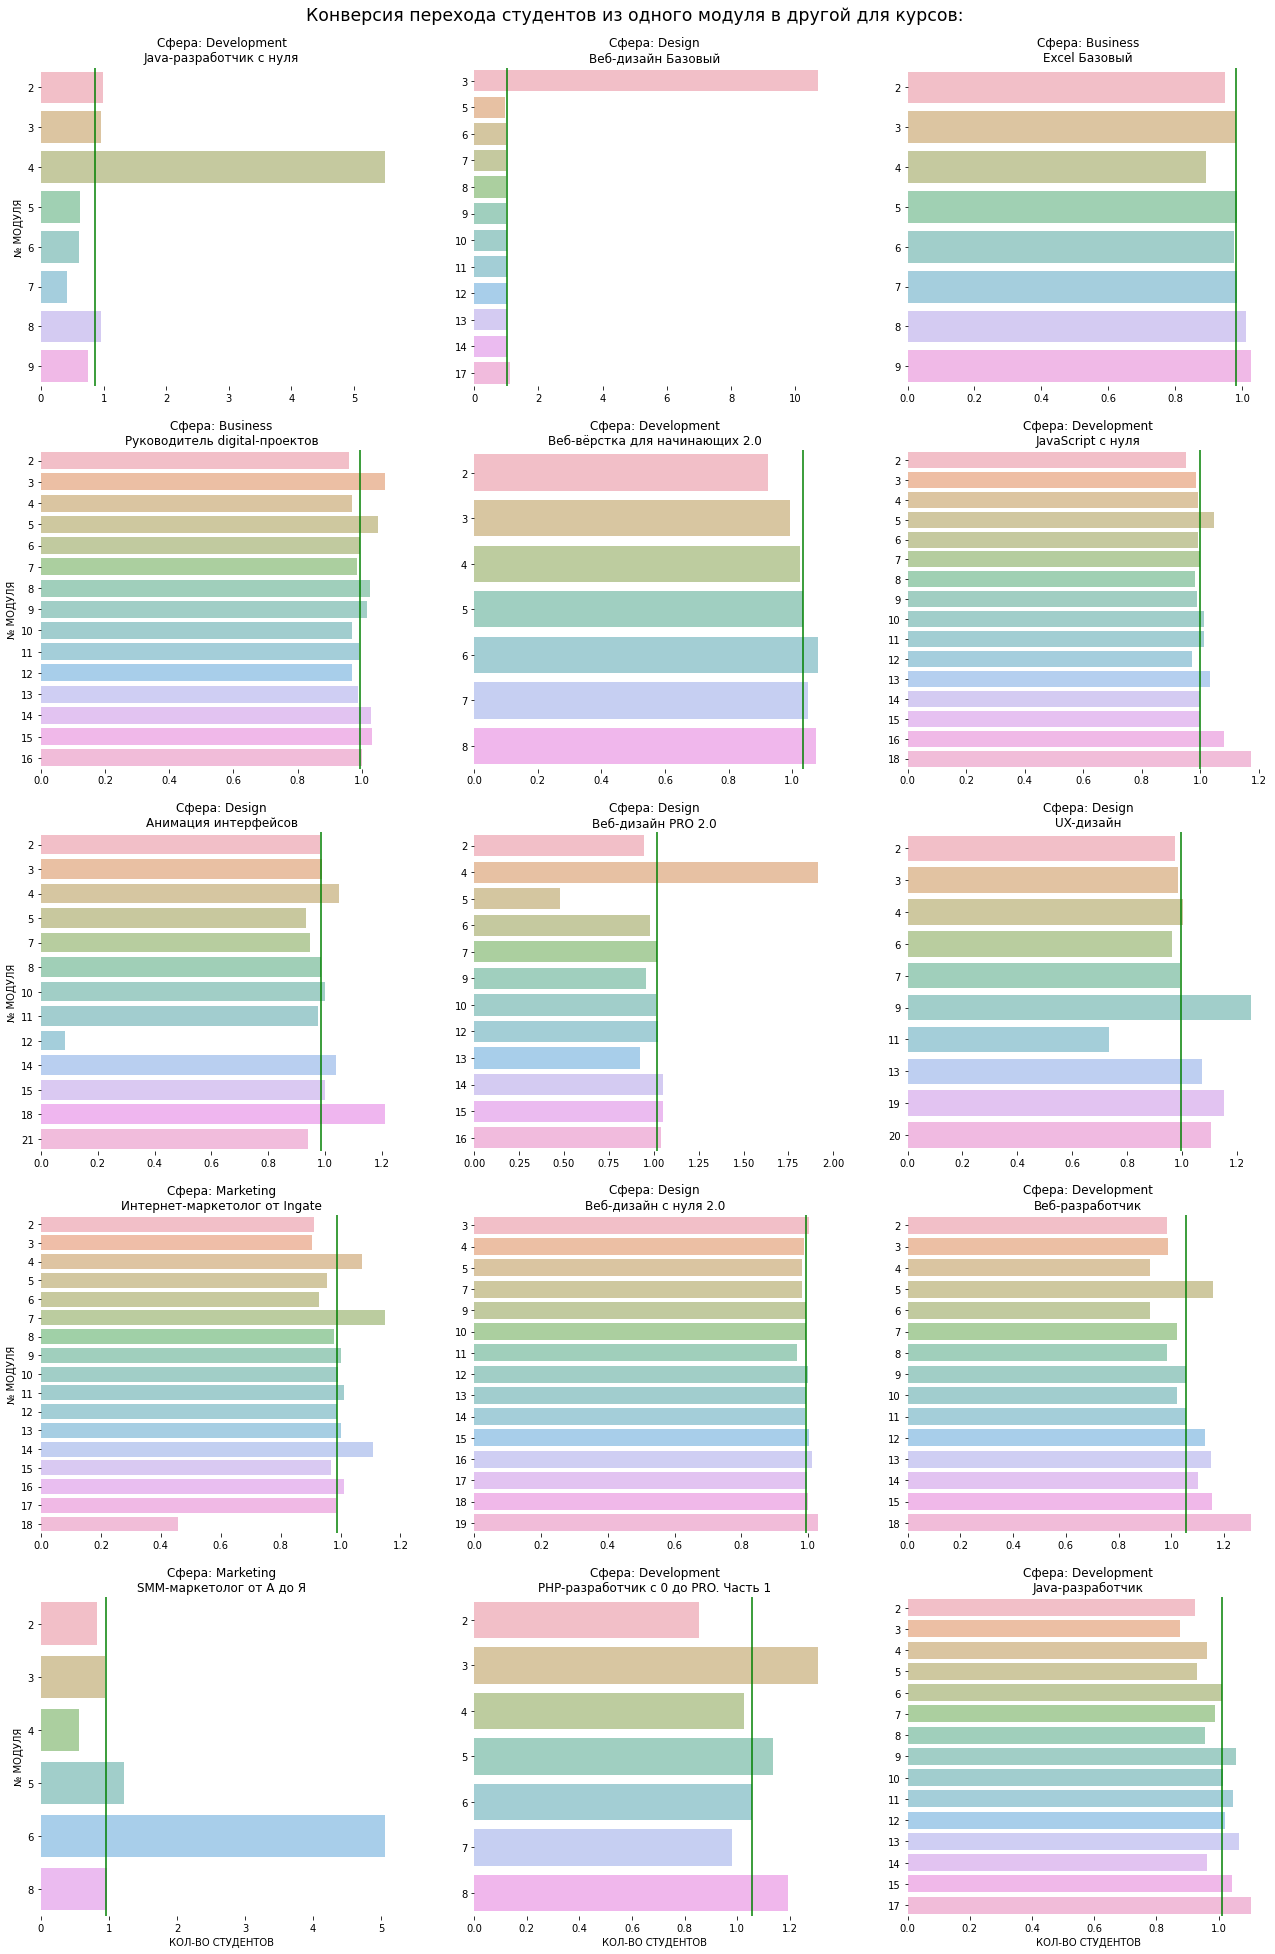

In [472]:
barplot_courses2(
    title_sample="Конверсия перехода студентов из одного модуля в другой для курсов:", 
    xlabel="КОЛ-ВО СТУДЕНТОВ", 
    ylabel="№ МОДУЛЯ", 
    xcolumn="hws_conversion", 
    ycolumn="module_number",
    df=conversion_df,
    is_rotate=False
)

### Выводы на основании рассчитанных данных: 
* Согласно рассчитанным значениям, количество студентов, переходящих из модуля в модуль, постепенно уменьшается. Рассмотрим, например, курс "Excel Базовый". Из 458 студентов, выполнивших ДЗ в первом модуле, всего 91 дошел до конца и выполнил экзаменационную работу. 
* Тем не менее, конверсия перехода студентов из модуля в модуль стабильна и для всех курсов ее медианное значение немногим меньше 1. Конверсия отражает количество студентов, приступивших к выполнению ДЗ в отдельно взятом модуле, к количеству студентов, сдавших работу в предыдущем модуле. Таким образом, несмотря на то, что из модуля в модуль количество студентов, продолжающих обучение, снижается, это происходит **постепенно**, поэтому конверсия остается стабильной, поскольку мы считаем относительное значение.